In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
img=image.load_img("D:/python1/facerecognition/cnnimage/train/chandler/13.png")

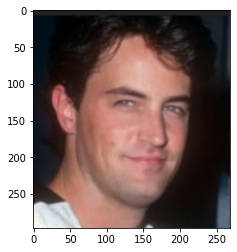

In [3]:
plt.imshow(img)


In [4]:
cv2.imread("D:/python1/facerecognition/cnnimage/train/chandler/13.png")

array([[[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 32,  32,  32]],

       ...,

       [[244, 250, 247],
        [245, 252, 249],
        [244, 251, 249],
        ...,
        [125, 107,  88],
        [120, 103,  86],
        [113,  97,  82]],

       [[245, 251, 248],
        [245, 252, 249],
        [244, 251, 249],
        ...,
        [125, 107,  88],
        [120, 103,  86],
        [114,  97,  82]],

       [[244, 250, 247],
        [244, 251, 248],
        [243, 250, 247],
        ...,
        [125, 107,  88],
        [121, 103,  87],
        [115,  98,  83]]

In [5]:
cv2.imread("D:/python1/facerecognition/cnnimage/train/chandler/13.png").shape

(297, 269, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory(directory="D:/python1/facerecognition/cnnimage/train",target_size=(200,200),batch_size=3,class_mode='binary')

validation_dataset=validation.flow_from_directory(directory="D:/python1/facerecognition/cnnimage/validation",target_size=(200,200),batch_size=3,class_mode='binary')

Found 32 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'chandler': 0, 'joey': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
model=Sequential([Conv2D(16,(3,3),activation='relu',
    input_shape=(200,200,3)),MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),Conv2D(64,(3,3),activation='relu'),MaxPool2D(2,2),
    Flatten(),Dense(512,activation='relu'),Dense(1,activation='sigmoid')])

In [11]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [12]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 448ms/step - loss: 2.9196 - accuracy: 0.2222 - val_loss: 1.0437 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 255ms/step - loss: 1.4127 - accuracy: 0.0000e+00 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 264ms/step - loss: 0.7042 - accuracy: 0.3750 - val_loss: 0.6328 - val_accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 1s 257ms/step - loss: 0.5829 - accuracy: 0.7778 - val_loss: 0.7916 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 266ms/step - loss: 0.8923 - accuracy: 0.3333 - val_loss: 0.6594 - val_accuracy: 0.6875
Epoch 6/10
3/3 [==============================] - 1s 257ms/step - loss: 0.7428 - accuracy: 0.4444 - val_loss: 0.6560 - val_accuracy: 0.5938
Epoch 7/10
3/3 [==============================] - 1s 255ms/step - loss: 0.6661 - accuracy: 0.6667 - val_loss: 0.6510 - val_accuracy: 0.9062
Epoch 8/10
3/3 [

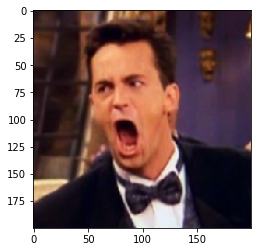

this guy is CHANDLER


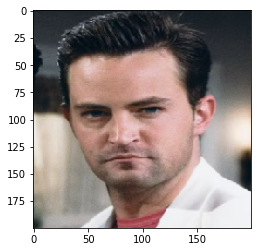

this guy is CHANDLER


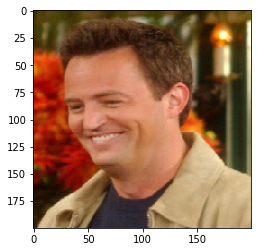

this guy is CHANDLER


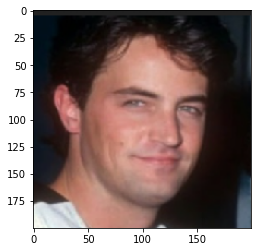

this guy is CHANDLER


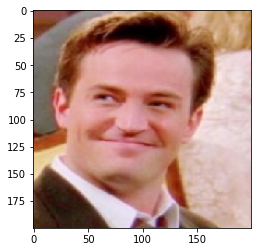

this guy is CHANDLER


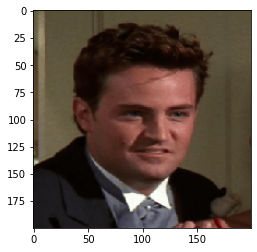

this guy is CHANDLER


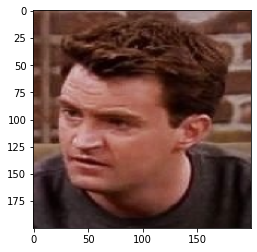

this guy is CHANDLER


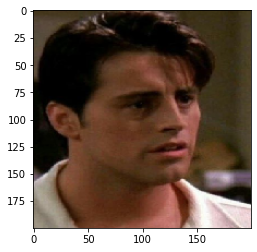

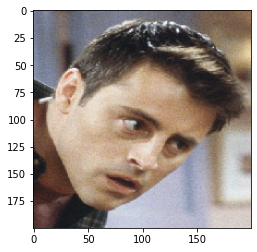

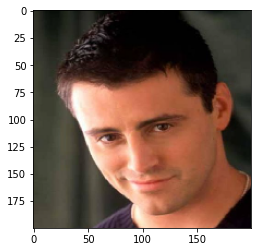

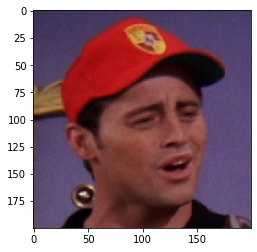

this guy is CHANDLER


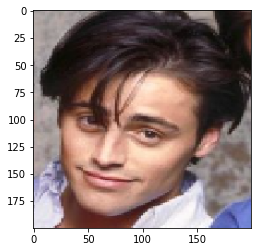

this guy is CHANDLER


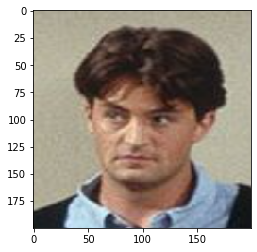

this guy is CHANDLER


In [15]:
dir_path='D:/python1/facerecognition/cnnimage/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0:
        print("this guy is CHANDLER")
    if val==1:
        print("this guy is JOEY")